# Sales Pipeline Conversion at a SaaS Startup Case Study

```Name``` - Vaibhav Khandekar

```Enrollment No.``` - 230340325073

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import os

## Loading Dataset

In [2]:
df = pd.read_excel('/content/drive/MyDrive/DBDA/6/Re Exam/Sales Pipeline Conversion at a SaaS Startup Case Study/Sales Dataset.xlsx')
df

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,N00078021,ERP Implementation,Hyderabad,Enterprise Sellers,0,Loss,2,53258,100K or less,1K or less,"50,000 - 100,000",Unknown,50K to 60K
78021,N00078022,Technical Business Solutions,Kolkata,Enterprise Sellers,0,Won,1,40804,100K or less,1K or less,0 (No business),Unknown,40K to 50K
78022,N00078023,ERP Implementation,Hyderabad,Enterprise Sellers,0,Loss,2,39241,100K or less,1K or less,0 (No business),Unknown,30K to 40K
78023,N00078024,ERP Implementation,Hyderabad,Marketing,0,Loss,2,44432,100K or less,1K or less,0 (No business),Unknown,40K to 50K


In [3]:
df.shape

(78025, 13)

In [4]:
df.columns

Index(['Opportunity ID', 'Technology\nPrimary', 'City', 'B2B Sales Medium',
       'Sales Velocity', 'Opportunity Status', 'Sales Stage Iterations',
       'Opportunity Size (USD)', 'Client Revenue Sizing',
       'Client Employee Sizing', 'Business from Client Last Year',
       'Compete Intel', 'Opportunity Sizing'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   78025 non-null  object
 12  Opportunity Sizing              78025 non-null

In [6]:
df.describe()

,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
count,78025.000000,78025.000000,78025.000000
mean,43.595348,2.955732,30085.664992
std,26.585600,1.497242,21169.932617
min,0.000000,1.000000,0.000000
25%,19.000000,2.000000,13816.000000
50%,43.000000,3.000000,29845.000000
75%,65.000000,3.000000,43185.000000
max,210.000000,23.000000,149981.000000


In [7]:
df.isnull().sum()

Opportunity ID                    0
Technology\nPrimary               0
City                              0
B2B Sales Medium                  0
Sales Velocity                    0
Opportunity Status                0
Sales Stage Iterations            0
Opportunity Size (USD)            0
Client Revenue Sizing             0
Client Employee Sizing            0
Business from Client Last Year    0
Compete Intel                     0
Opportunity Sizing                0
dtype: int64

## Exploratory Data Analysis

### Corelation-Coefficient

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales Velocity,Sales Stage Iterations,Opportunity Size (USD)
Sales Velocity,1.000000,-0.025329,-0.009879
Sales Stage Iterations,-0.025329,1.000000,0.064593
Opportunity Size (USD),-0.009879,0.064593,1.000000


### Heatmap of Corelation-Coefficient

<ipython-input-9-a4d6a5eb07b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

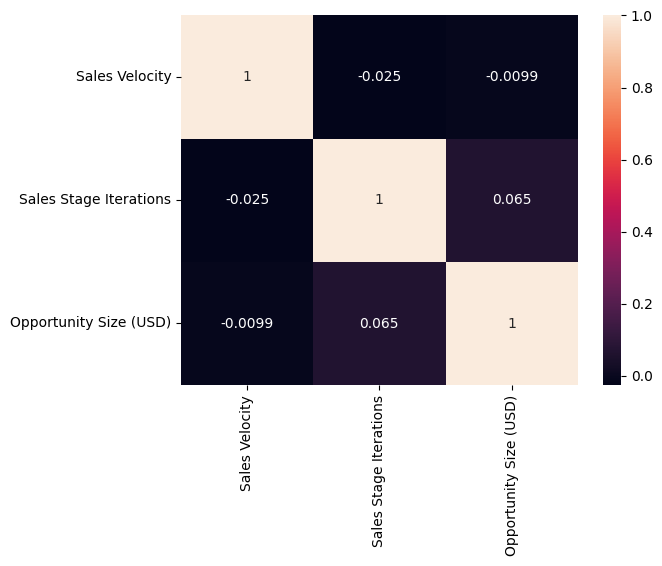

In [9]:
sb.heatmap(df.corr(), annot=True)

### Technology\nPrimary



In [10]:
df['Technology\nPrimary'].value_counts()

ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: Technology\nPrimary, dtype: int64

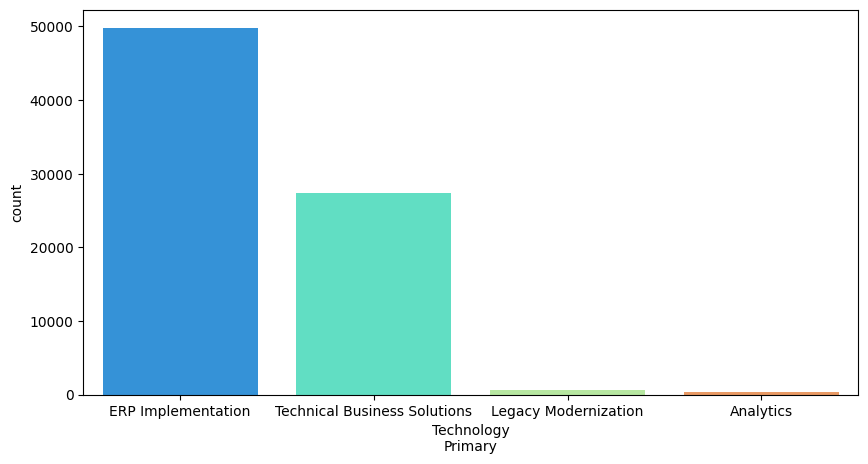

In [11]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Technology\nPrimary'], palette='rainbow')
plt.show()

### City

In [12]:
df['City'].value_counts()

Mumbai       21020
Delhi        15142
Bengaluru     9552
Hyderabad     9232
Pune          8153
Chennai       7568
Kolkata       7358
Name: City, dtype: int64

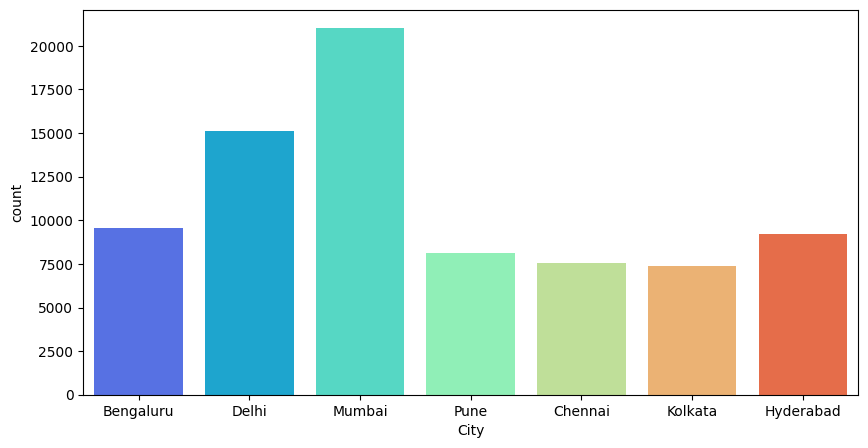

In [13]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['City'], palette='rainbow')
plt.show()

### B2B Sales Medium

In [14]:
df['B2B Sales Medium'].value_counts()

Marketing             37262
Enterprise Sellers    34758
Partners               2856
Tele Sales             2530
Online Leads            619
Name: B2B Sales Medium, dtype: int64

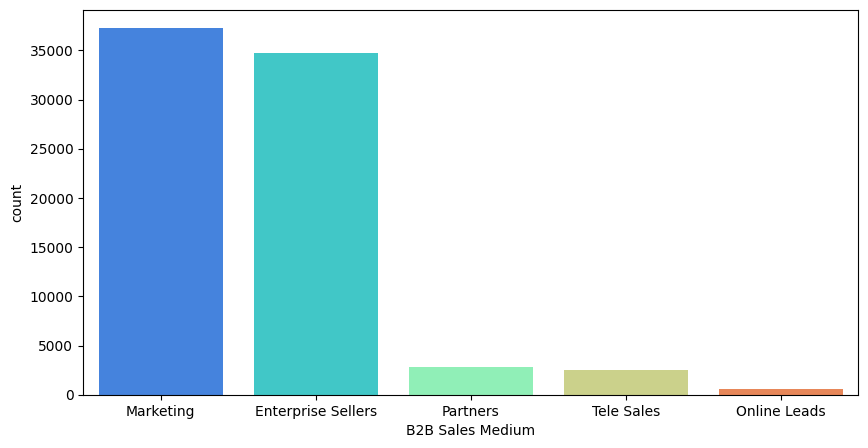

In [15]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['B2B Sales Medium'], palette='rainbow')
plt.show()

### Opportunity Status

In [16]:
df['Opportunity Status'].value_counts()

Loss    60398
Won     17627
Name: Opportunity Status, dtype: int64

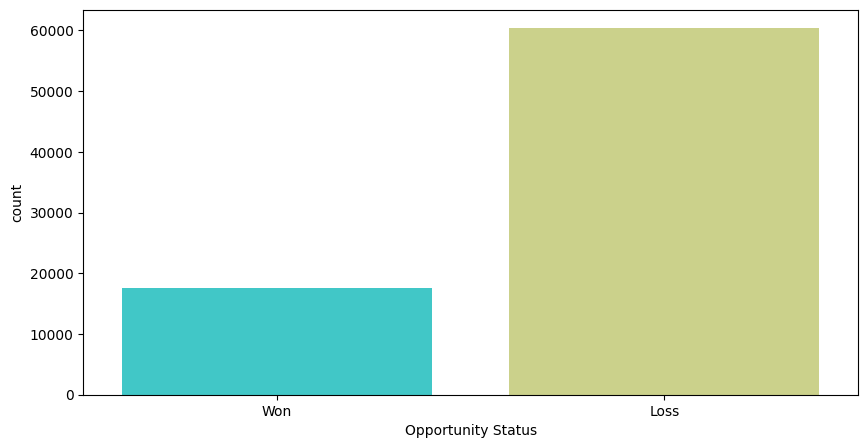

In [17]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Opportunity Status'], palette='rainbow')
plt.show()

### Client Revenue Sizing

In [18]:
df['Client Revenue Sizing'].value_counts()

100K or less    59504
More than 1M     5288
250K to 500K     4756
500K to 1M       4636
100K to 250K     3841
Name: Client Revenue Sizing, dtype: int64

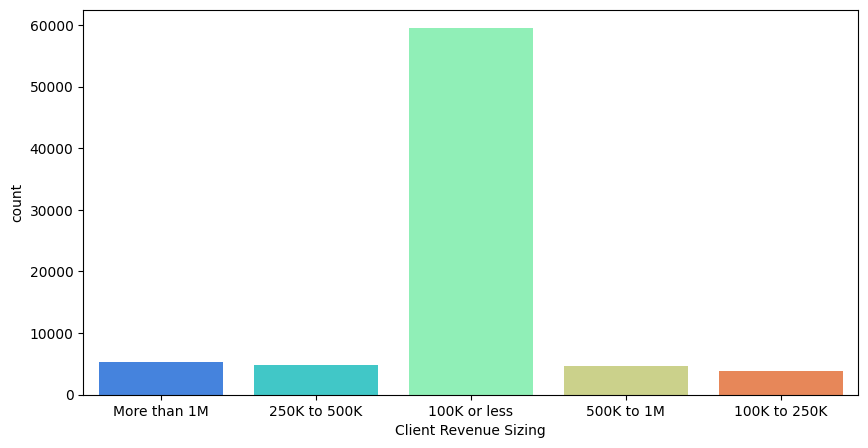

In [19]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Client Revenue Sizing'], palette='rainbow')
plt.show()

### Client Employee Sizing

In [20]:
df['Client Employee Sizing'].value_counts()

1K or less       59348
More than 25K     5098
5K to 15K         4942
1K to 5K          4528
15K to 25K        4109
Name: Client Employee Sizing, dtype: int64

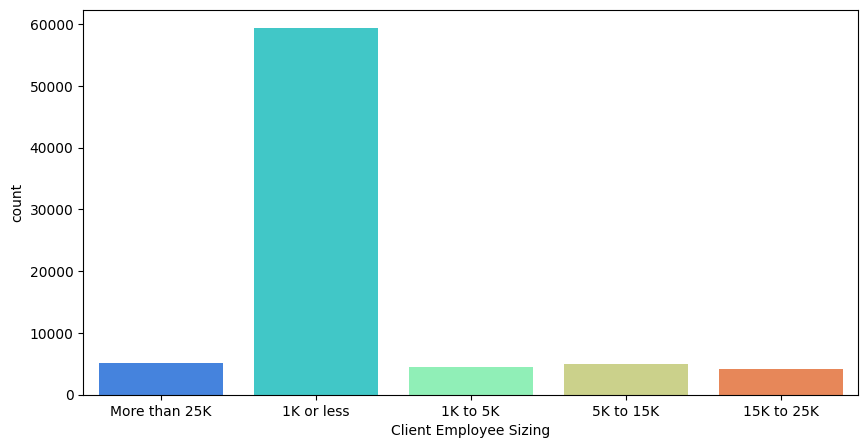

In [21]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Client Employee Sizing'], palette='rainbow')
plt.show()

### Business from Client Last Year

In [22]:
df['Business from Client Last Year'].value_counts()

0 (No business)      69208
More than 100,000     2860
50,000 - 100,000      2092
25,000 - 50,000       2083
0 - 25,000            1782
Name: Business from Client Last Year, dtype: int64

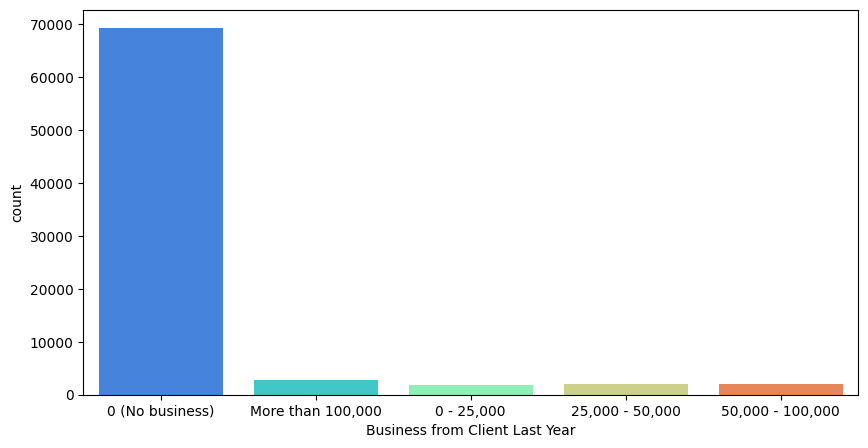

In [23]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Business from Client Last Year'], palette='rainbow')
plt.show()

### Compete Intel

In [24]:
df['Compete Intel'].value_counts()

Unknown    56724
Known      12044
None        9257
Name: Compete Intel, dtype: int64

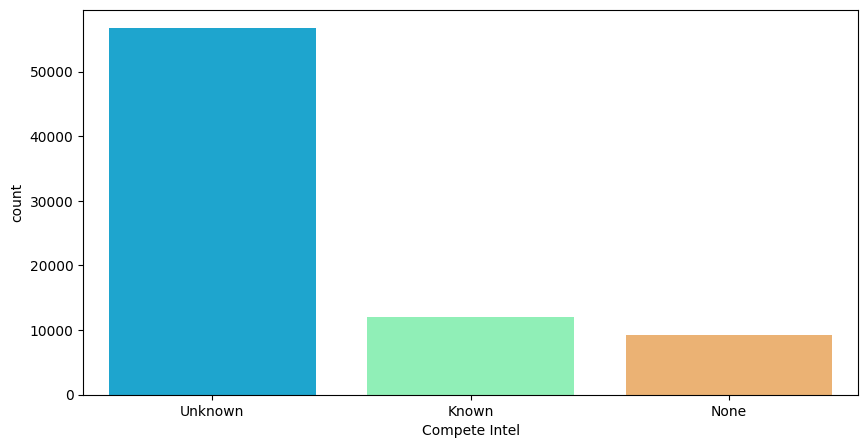

In [25]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Compete Intel'], palette='rainbow')
plt.show()

### Opportunity Sizing

In [26]:
df['Opportunity Sizing'].value_counts()

40K to 50K       18074
10K to 20K       15123
30K to 40K       13628
10K or less      12095
20K to 30K       11968
50K to 60K        4934
More than 60K     2203
Name: Opportunity Sizing, dtype: int64

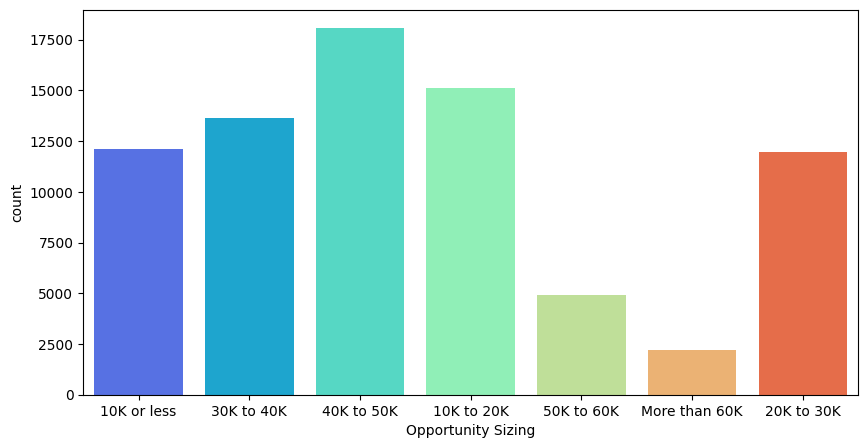

In [27]:
plt.figure(figsize=(10,5))
sb.countplot(data=df, x=df['Opportunity Sizing'], palette='rainbow')
plt.show()

## EDA on column ```Sales Velocity```

### Sales Velocity at Different Technologies

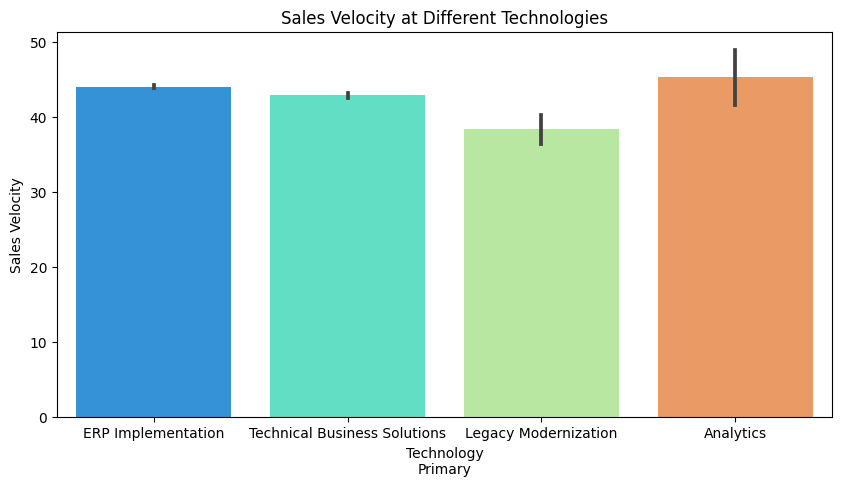

In [28]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Technologies')
sb.barplot(data=df, x=df['Technology\nPrimary'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Cities

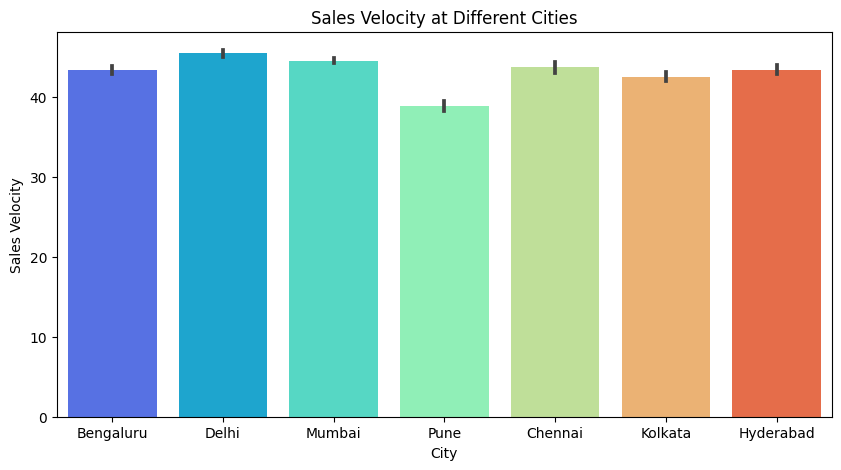

In [29]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Cities')
sb.barplot(data=df, x=df['City'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different B2B Sales Mediums

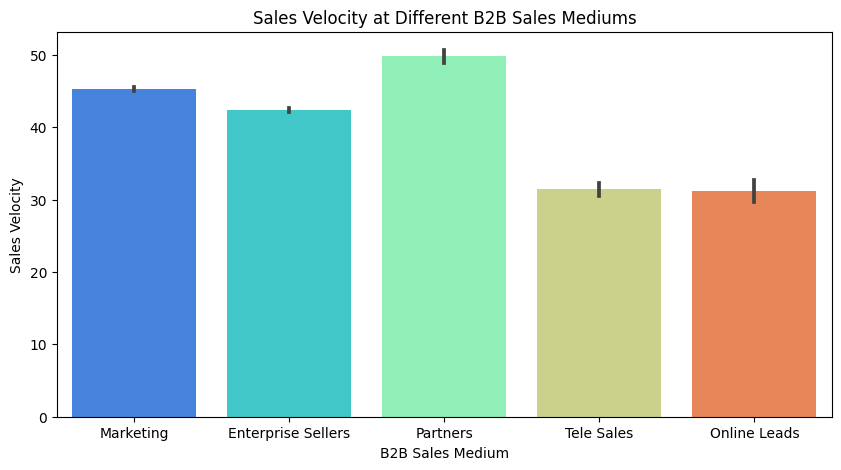

In [30]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different B2B Sales Mediums')
sb.barplot(data=df, x=df['B2B Sales Medium'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Statuses at Opportunities Statuses

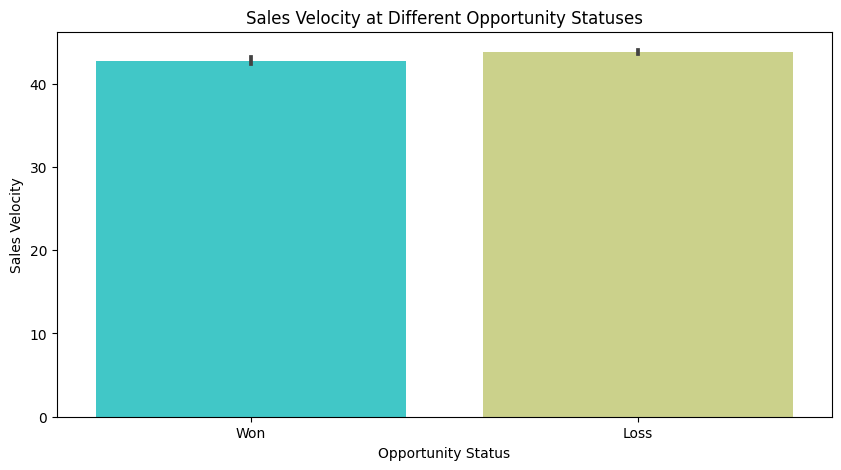

In [31]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Opportunity Statuses')
sb.barplot(data=df, x=df['Opportunity Status'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Sales Stage Iterations

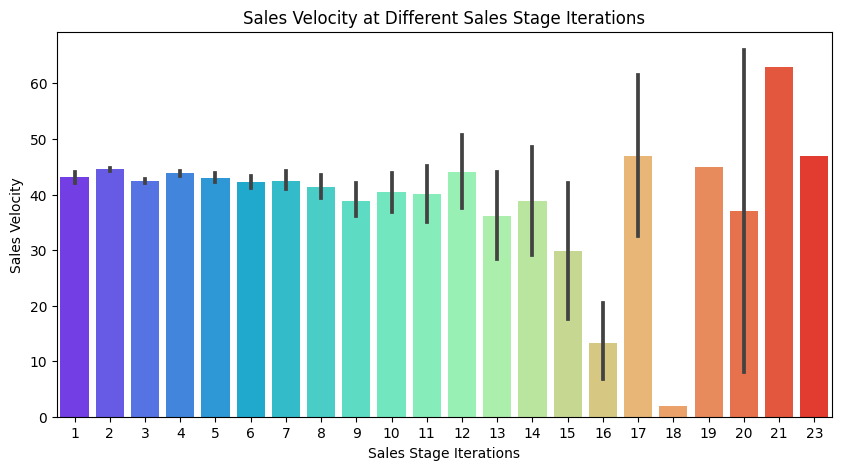

In [32]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Sales Stage Iterations')
sb.barplot(data=df, x=df['Sales Stage Iterations'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Client Revenue Sizing

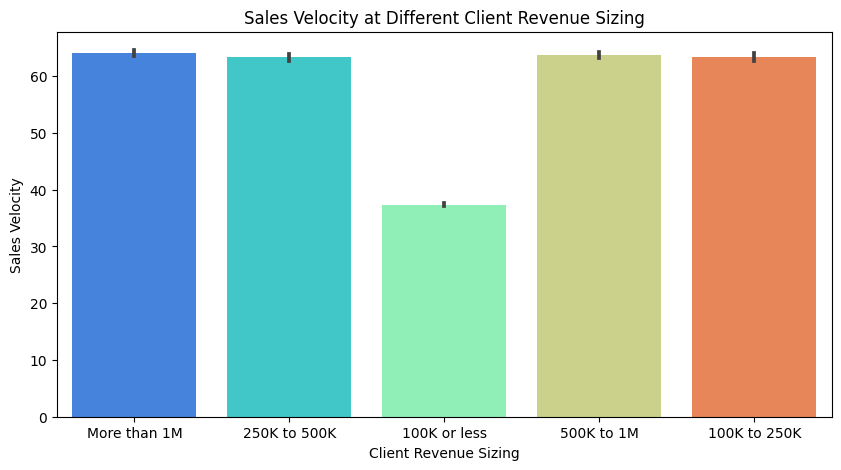

In [33]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Client Revenue Sizing')
sb.barplot(data=df, x=df['Client Revenue Sizing'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Client Employee Sizing

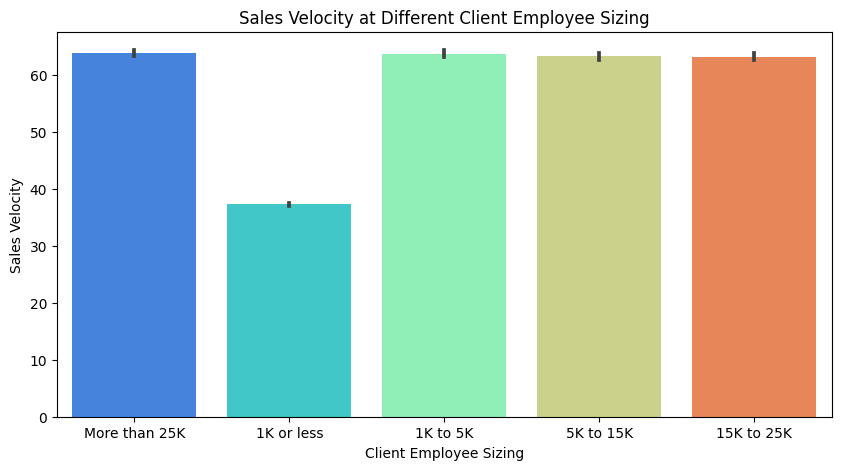

In [34]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Client Employee Sizing')
sb.barplot(data=df, x=df['Client Employee Sizing'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Business from Client Last Year

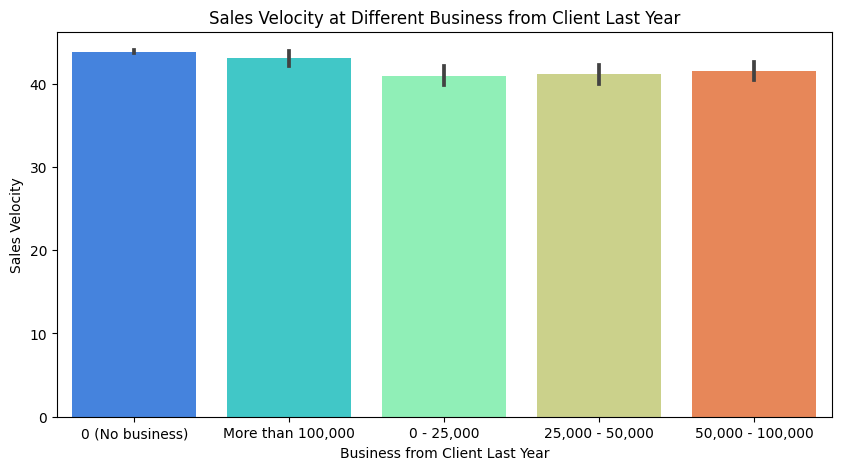

In [35]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Business from Client Last Year')
sb.barplot(data=df, x=df['Business from Client Last Year'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Compete Intels

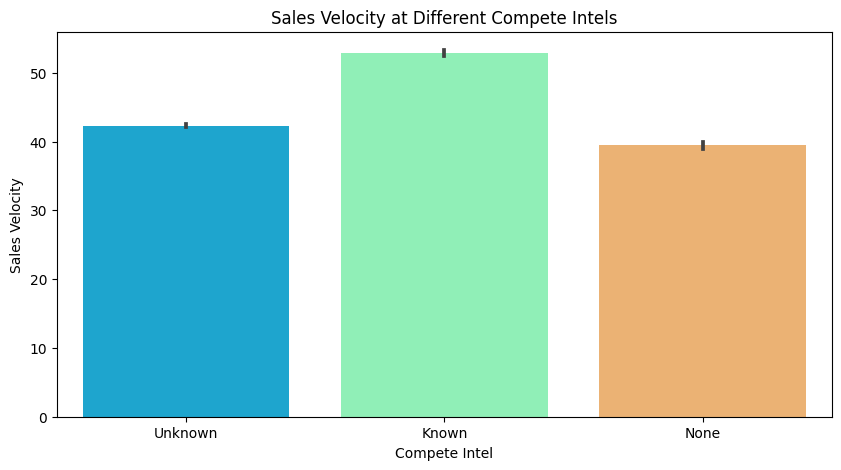

In [36]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Compete Intels')
sb.barplot(data=df, x=df['Compete Intel'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

### Sales Velocity at Different Opportunities Sizing

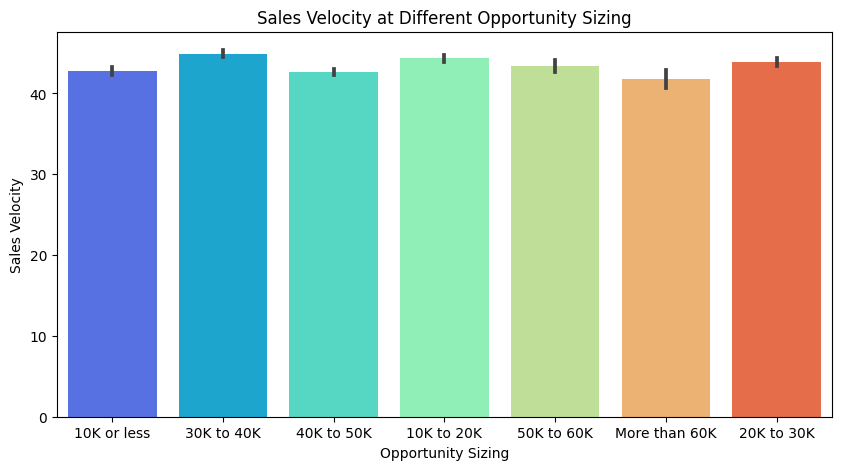

In [37]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Opportunity Sizing')
sb.barplot(data=df, x=df['Opportunity Sizing'], y=df['Sales Velocity'], palette='rainbow')
plt.show()

## EDA on column Sales ```Stage Iterations```

### Sales Stage Iterations at Different Technologies

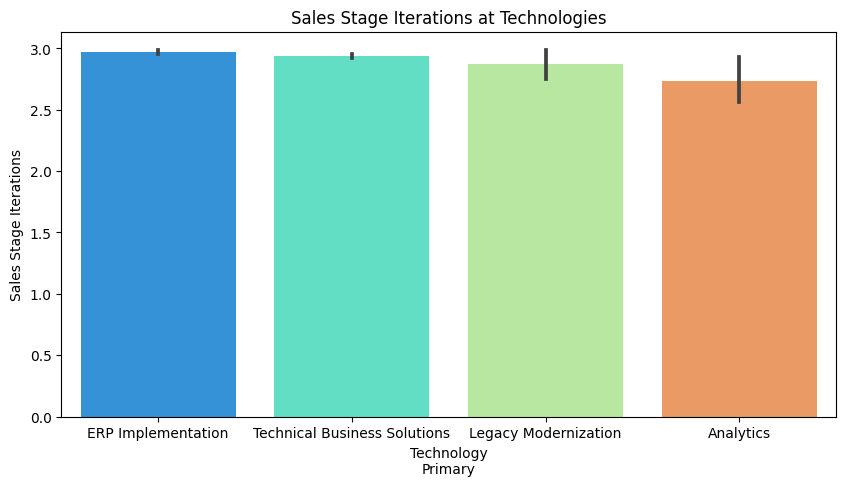

In [38]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Technologies')
sb.barplot(data=df, x=df['Technology\nPrimary'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Cities

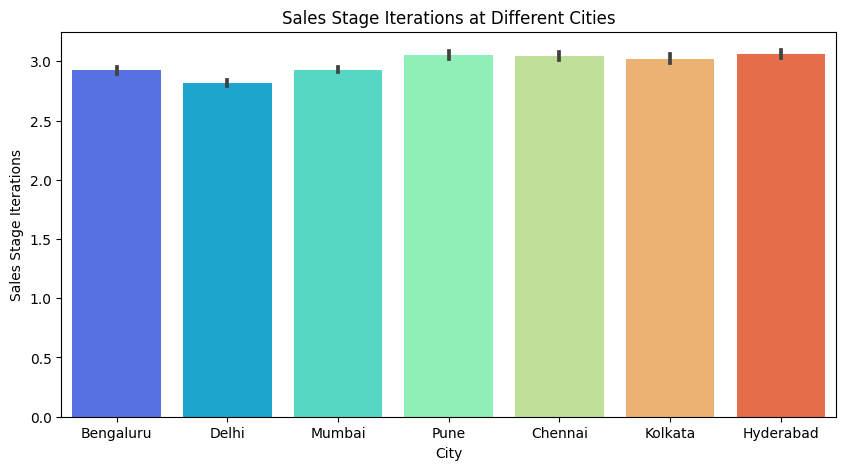

In [39]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Cities')
sb.barplot(data=df, x=df['City'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different B2B Sales Mediums

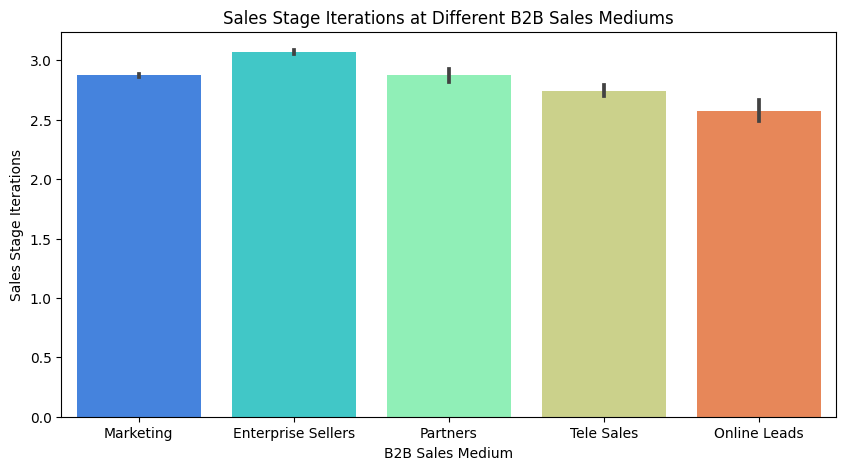

In [40]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different B2B Sales Mediums')
sb.barplot(data=df, x=df['B2B Sales Medium'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Opportunities Statuses

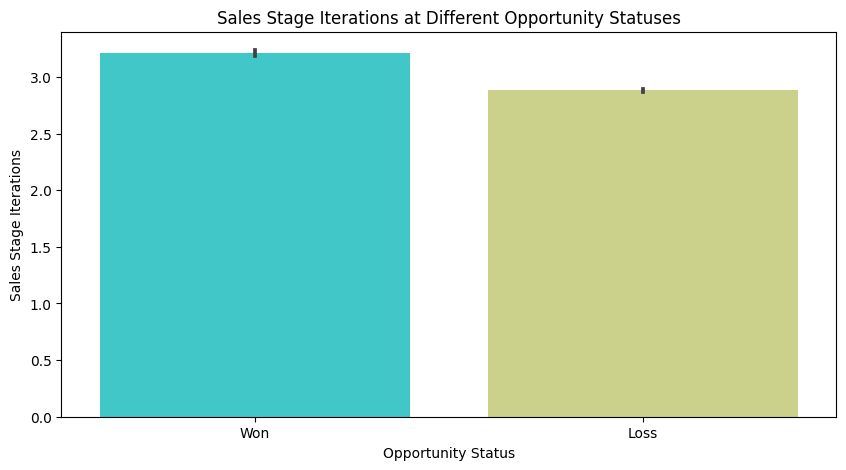

In [41]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Opportunity Statuses')
sb.barplot(data=df, x=df['Opportunity Status'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Sales Stage Iterations

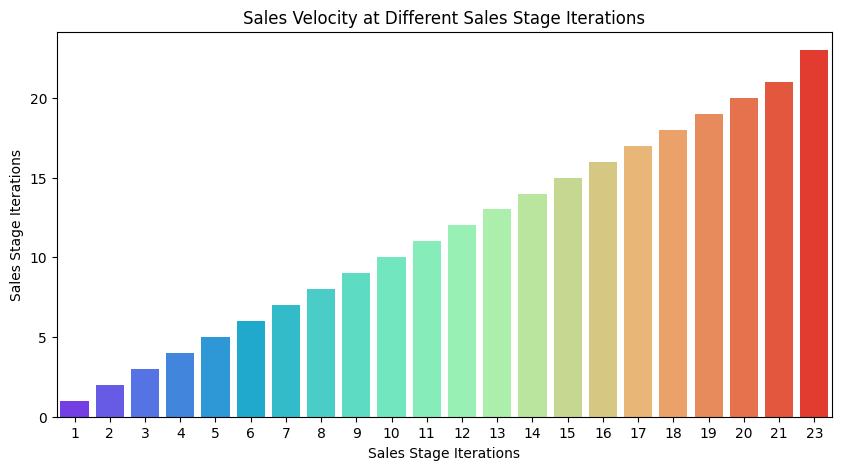

In [42]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Sales Stage Iterations')
sb.barplot(data=df, x=df['Sales Stage Iterations'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Client Revenue Sizing

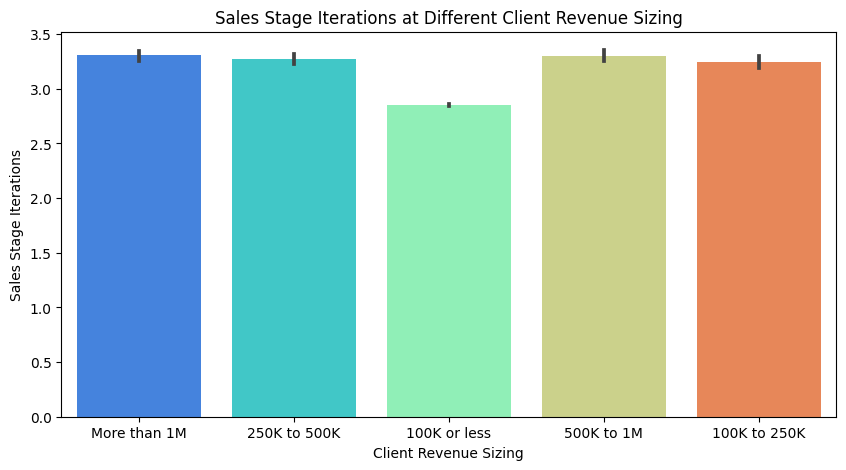

In [43]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Client Revenue Sizing')
sb.barplot(data=df, x=df['Client Revenue Sizing'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Client Employee Sizing

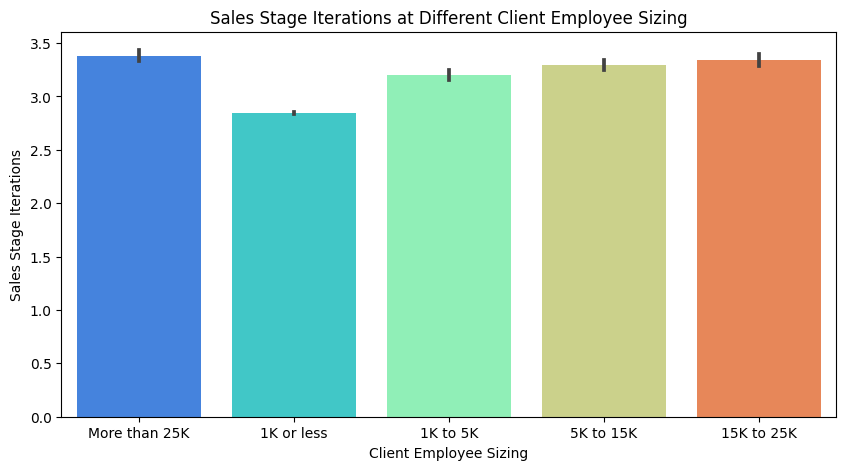

In [44]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Client Employee Sizing')
sb.barplot(data=df, x=df['Client Employee Sizing'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Business from Client Last Year

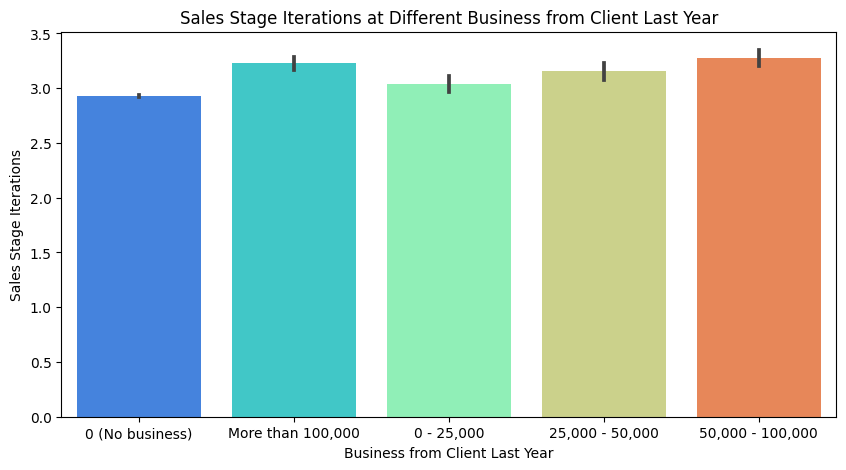

In [45]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Business from Client Last Year')
sb.barplot(data=df, x=df['Business from Client Last Year'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Compete Intels

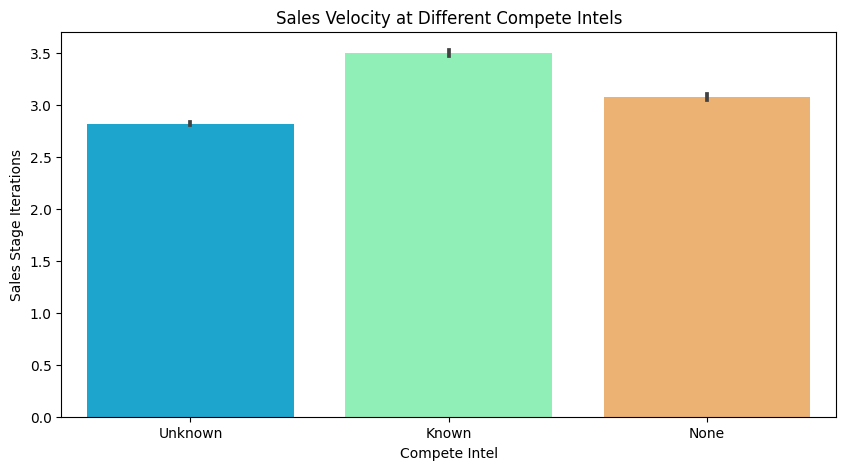

In [46]:
plt.figure(figsize=(10,5))
plt.title('Sales Velocity at Different Compete Intels')
sb.barplot(data=df, x=df['Compete Intel'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

### Sales Stage Iterations at Different Opportunities Sizing

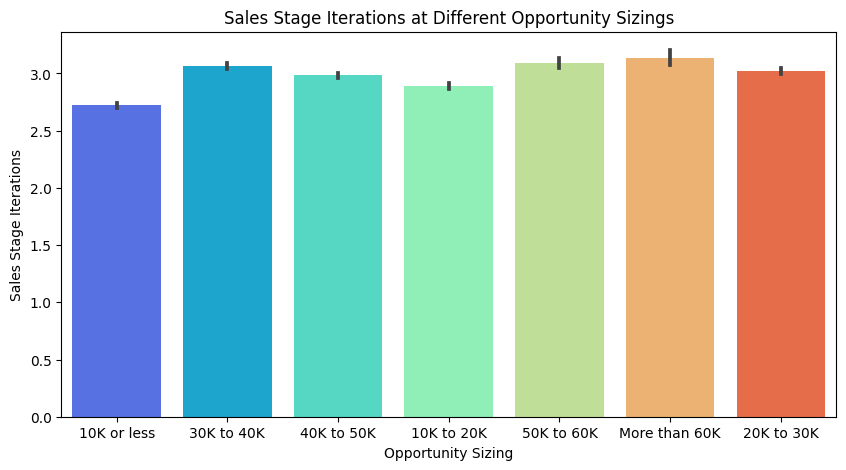

In [47]:
plt.figure(figsize=(10,5))
plt.title('Sales Stage Iterations at Different Opportunity Sizings')
sb.barplot(data=df, x=df['Opportunity Sizing'], y=df['Sales Stage Iterations'], palette='rainbow')
plt.show()

## EDA on column ```Opportunity Size (USD)```

### Opportunity Size(USD) at Different Technologies

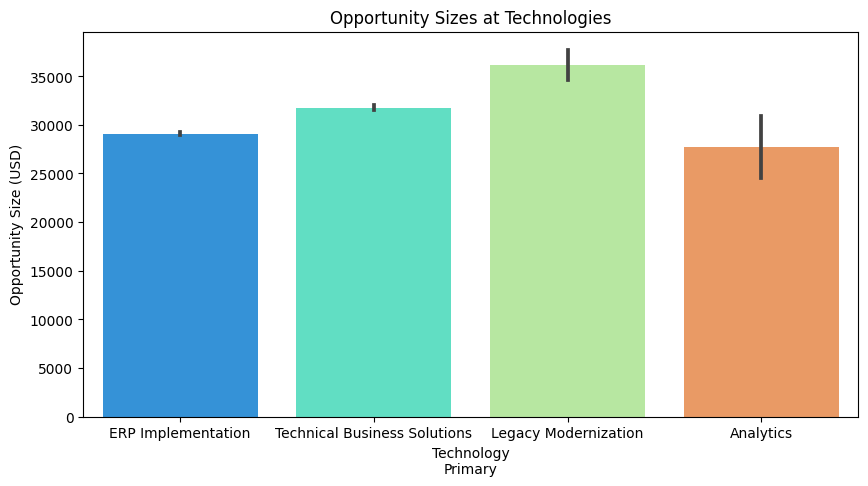

In [48]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Technologies')
sb.barplot(data=df, x=df['Technology\nPrimary'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Cities

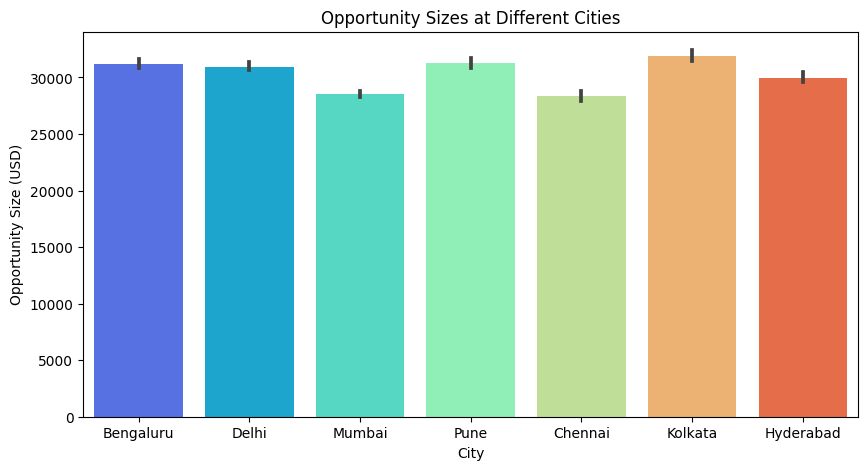

In [49]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Cities')
sb.barplot(data=df, x=df['City'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different B2B Sales Medium

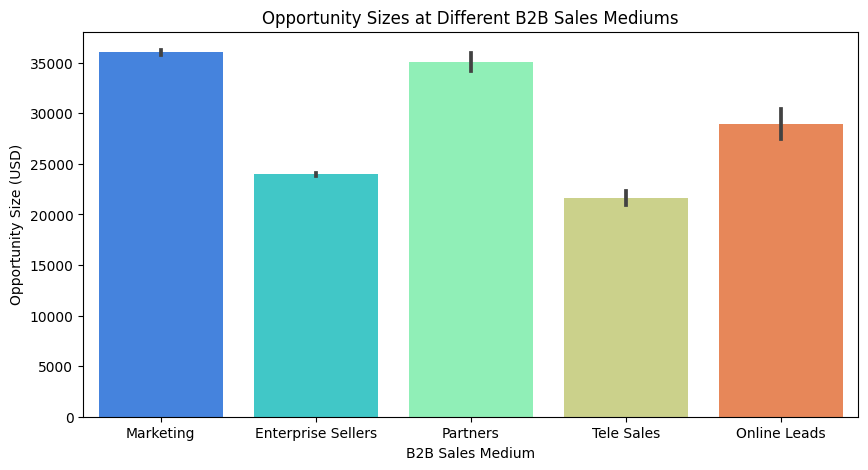

In [50]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different B2B Sales Mediums')
sb.barplot(data=df, x=df['B2B Sales Medium'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Opportunities Statuses

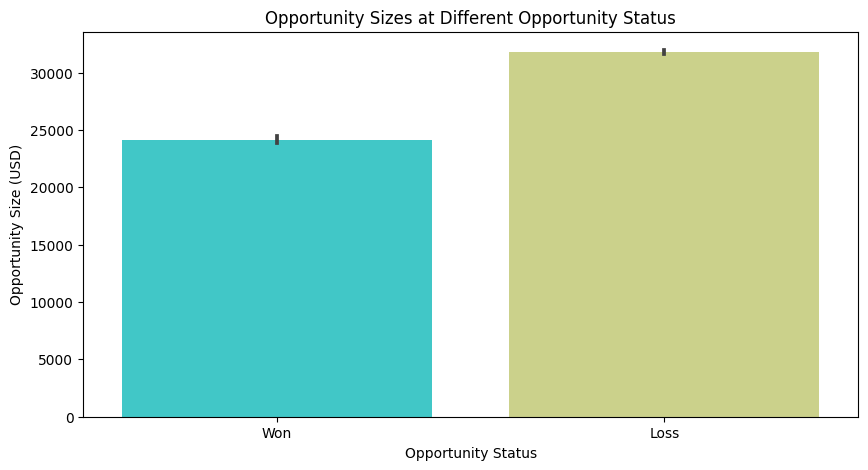

In [51]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Opportunity Status')
sb.barplot(data=df, x=df['Opportunity Status'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Sales Stage Iterations

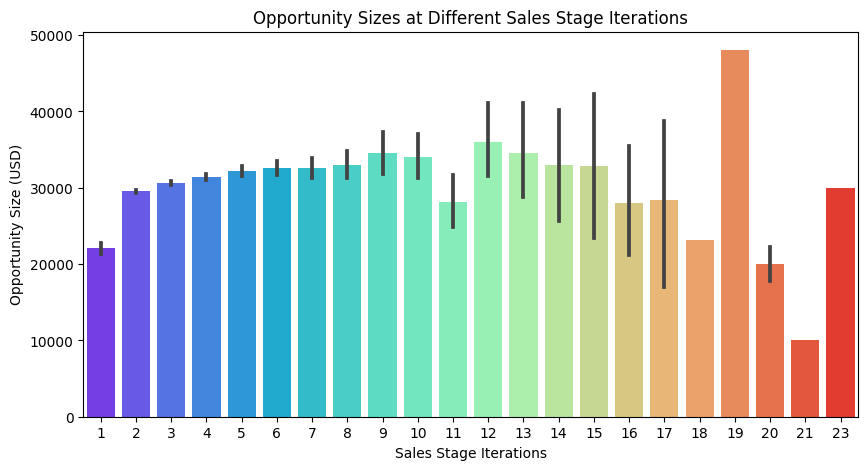

In [52]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Sales Stage Iterations')
sb.barplot(data=df, x=df['Sales Stage Iterations'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Client Revenue Sizing

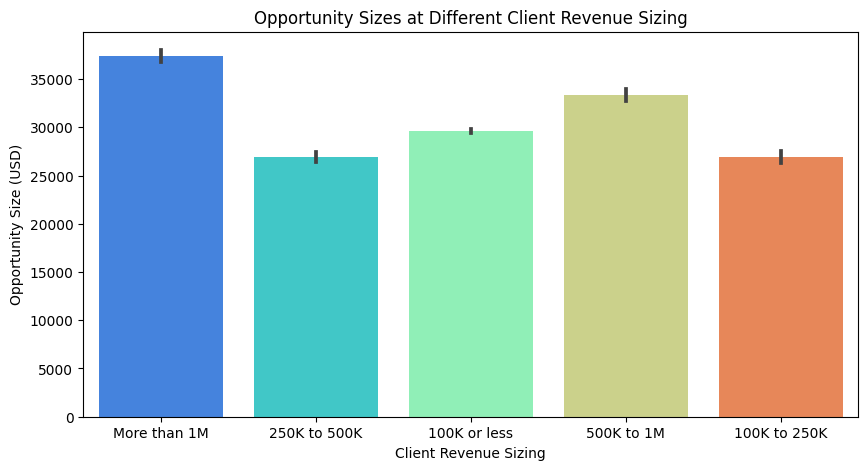

In [53]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Client Revenue Sizing')
sb.barplot(data=df, x=df['Client Revenue Sizing'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Client Employee Sizing

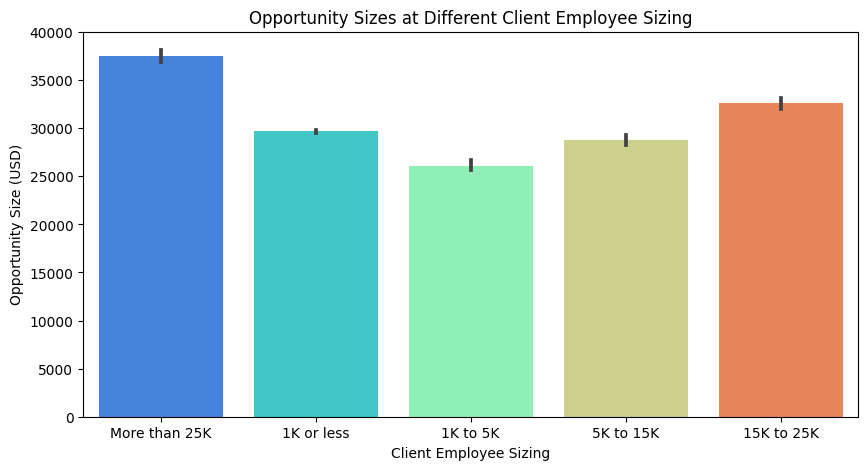

In [54]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Client Employee Sizing')
sb.barplot(data=df, x=df['Client Employee Sizing'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Business from Client Last Year

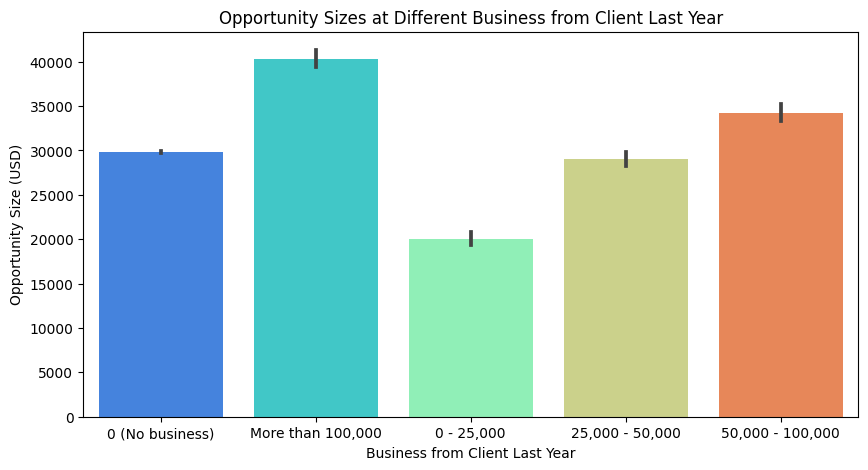

In [55]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Business from Client Last Year')
sb.barplot(data=df, x=df['Business from Client Last Year'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Compete Intels

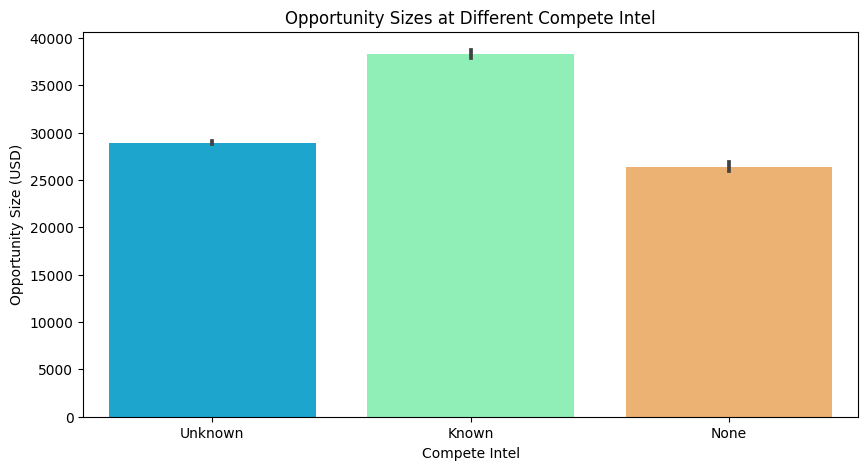

In [56]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Compete Intel')
sb.barplot(data=df, x=df['Compete Intel'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

### Opportunity Size(USD) at Different Opportunities Sizing

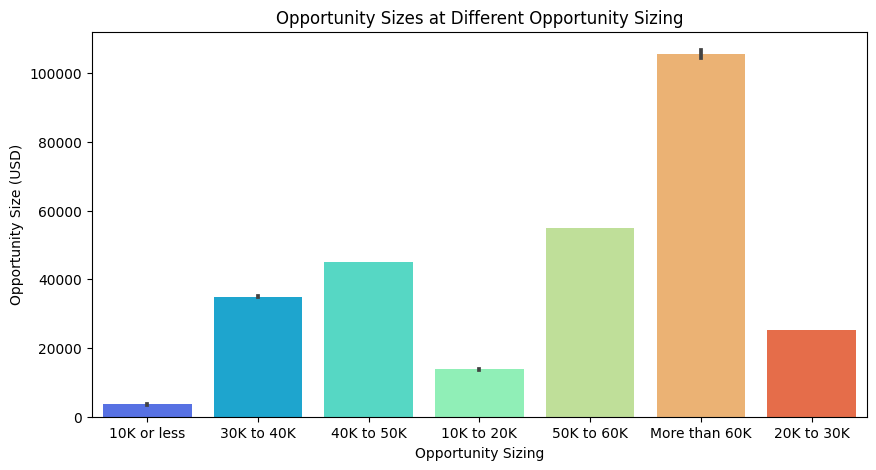

In [57]:
plt.figure(figsize=(10,5))
plt.title('Opportunity Sizes at Different Opportunity Sizing')
sb.barplot(data=df, x=df['Opportunity Sizing'], y=df['Opportunity Size (USD)'], palette='rainbow')
plt.show()

## Bivariate Analysis - ```Opportunity Status```

### Opportunity Status by Category at Different Technologies

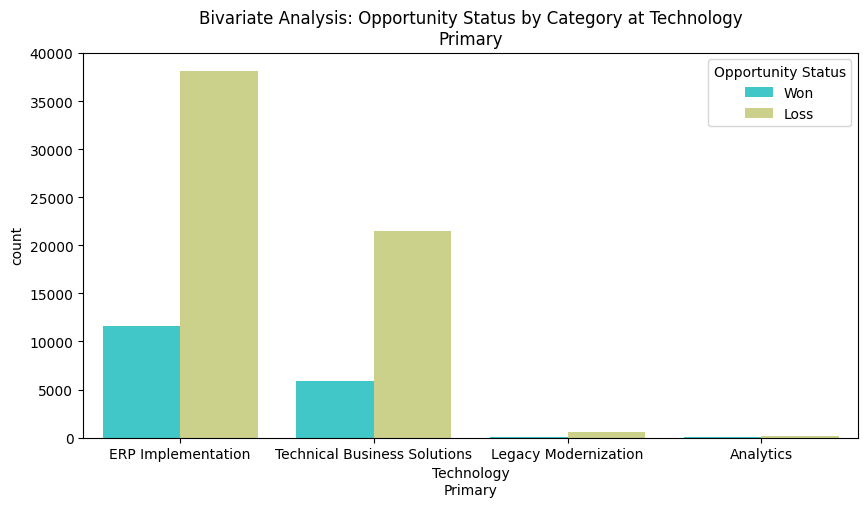

In [58]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Technology\nPrimary')
sb.countplot(data=df, x=df['Technology\nPrimary'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Cities

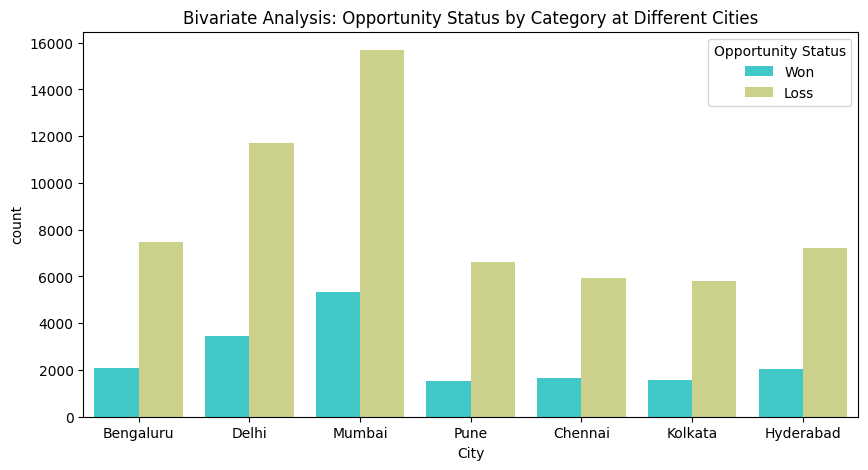

In [59]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Different Cities')
sb.countplot(data=df, x=df['City'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different B2B Sales Medium

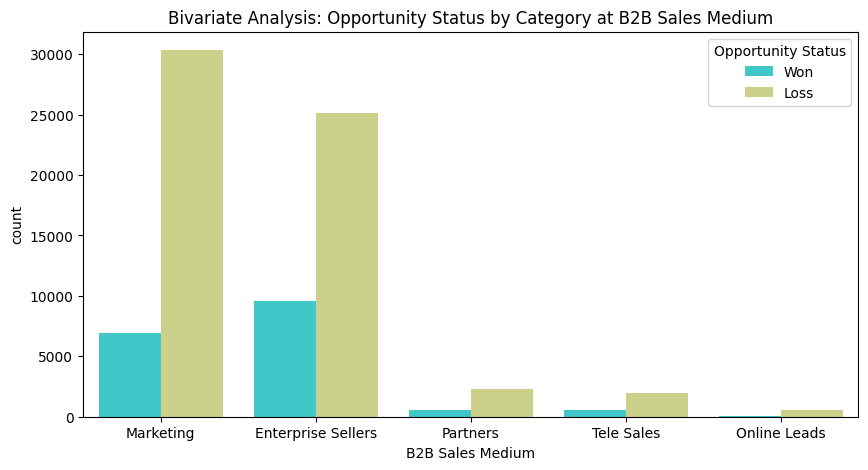

In [60]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at B2B Sales Medium')
sb.countplot(data=df, x=df['B2B Sales Medium'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Client Revenue Sizing

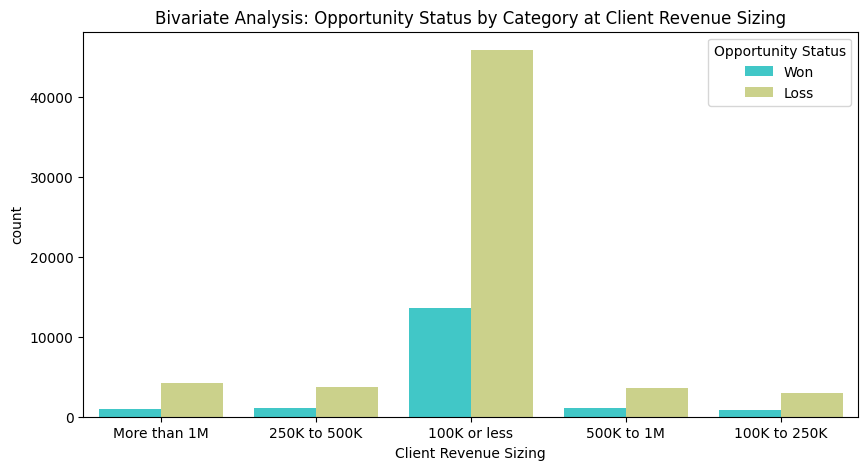

In [61]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Client Revenue Sizing')
sb.countplot(data=df, x=df['Client Revenue Sizing'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Client Employee Sizing

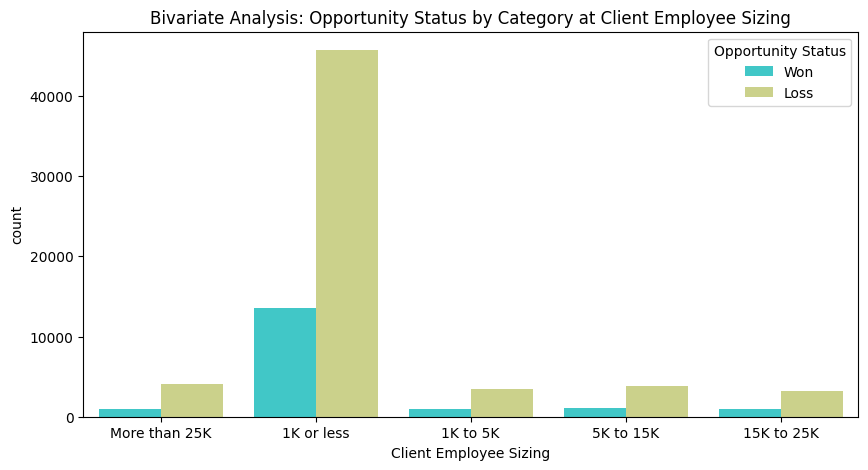

In [62]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Client Employee Sizing')
sb.countplot(data=df, x=df['Client Employee Sizing'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Business from Client Last Year

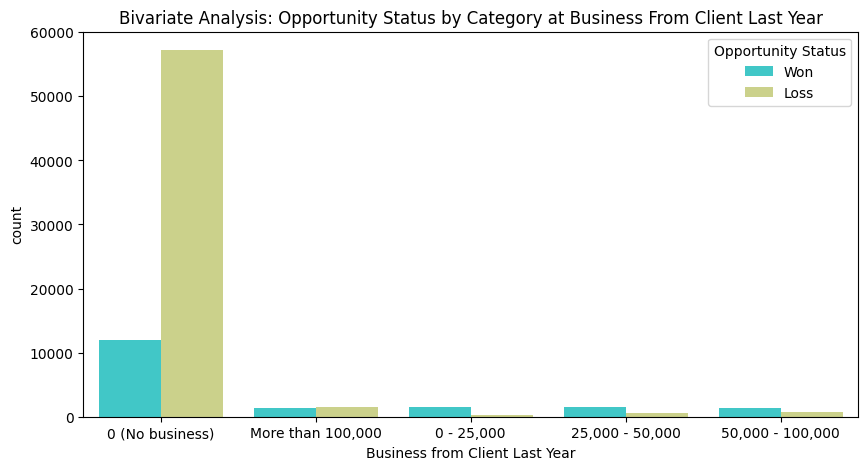

In [63]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Business From Client Last Year')
sb.countplot(data=df, x=df['Business from Client Last Year'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Compete Intels

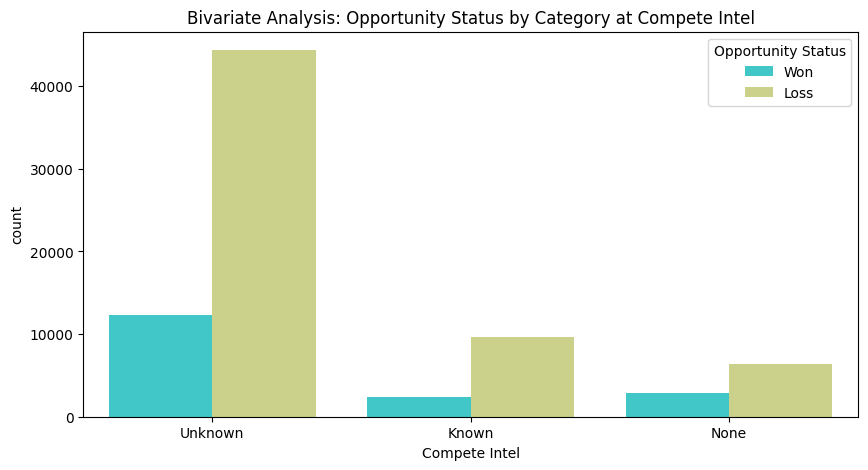

In [64]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Compete Intel')
sb.countplot(data=df, x=df['Compete Intel'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

### Opportunity Status by Category at Different Opportunity Sizing

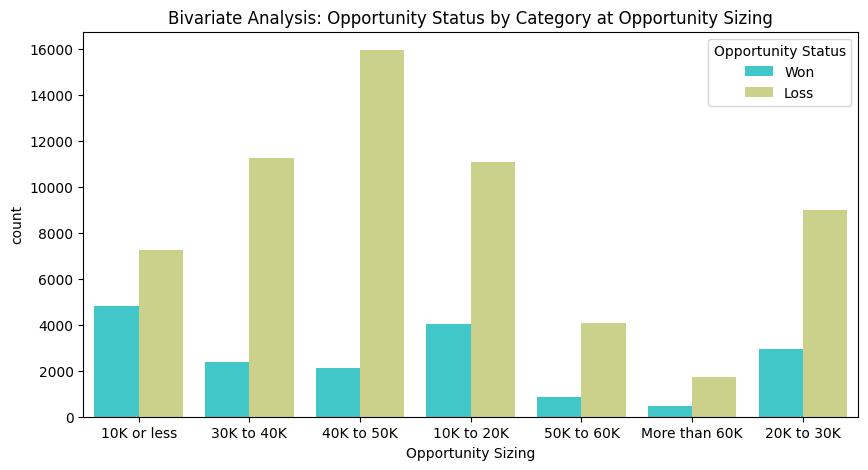

In [65]:
plt.figure(figsize=(10,5))
plt.title('Bivariate Analysis: Opportunity Status by Category at Opportunity Sizing')
sb.countplot(data=df, x=df['Opportunity Sizing'], hue=df['Opportunity Status'], palette='rainbow')
plt.show()

## Conclusion

### Dataset Overview:

- The dataset contains 78,025 entries with 13 columns, consisting of both numerical and categorical data.
- There are no missing values in any of the columns.

### Column Distribution:

- The analysis revealed the distribution of various categorical columns, such as 'Technology Primary', 'City', 'B2B Sales Medium', 'Opportunity Status', 'Client Revenue Sizing', 'Client Employee Sizing', 'Business from Client Last Year', 'Compete Intel', and 'Opportunity Sizing'.
- Understanding the distribution of these categories is crucial for identifying trends and patterns.

### Correlation Analysis:

- A correlation matrix was generated to understand the relationships between numerical columns. However, it seems that most columns are categorical in nature, and the correlation analysis might not yield meaningful insights in this case.

### Sales Velocity Analysis:

- Sales velocity was explored across various categories like technology, city, B2B sales medium, opportunity status, sales stage iterations, client revenue sizing, client employee sizing, business from client last year, compete intel, and opportunity sizing.
- Insights were gained into how these categories correlate with sales velocity, which can help identify areas for improvement.

### Opportunity Size Analysis:

- Similar to the sales velocity analysis, opportunity size was examined across different categories to understand how it varies and what impact it has on conversions.

### Bivariate Analysis - ```Opportunity Status```:

- Bivariate analysis was conducted to understand how different categories relate to the opportunity status.
- Patterns emerged in terms of which categories are associated with higher or lower chances of winning an opportunity.

### Insights and Conclusions:

- The dataset encompasses a wide range of technologies, cities, sales mediums, and client profiles, indicating a diverse customer base.
- Certain categories, such as 'Technology Primary' and 'City', have dominant options, while others like 'Compete Intel' have more varied distributions.
- Sales velocity and opportunity size differ significantly across categories, suggesting that tailoring strategies based on these categories could improve conversions.
- Opportunity status analysis revealed a higher proportion of losses compared to wins, indicating room for optimization in the sales process.
